# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts. During these phone campaigns, an attractive long-term deposit application, with good interest rates, was offered.

In [61]:
import pandas as pd
import numpy as np 
import pandas as pd 
import time

from sklearn import preprocessing, metrics
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [62]:
import pandas as pd

In [63]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [64]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [65]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [66]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [68]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [69]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


Text(0.5, 1.0, 'Correlation Matrix for the numerical features')

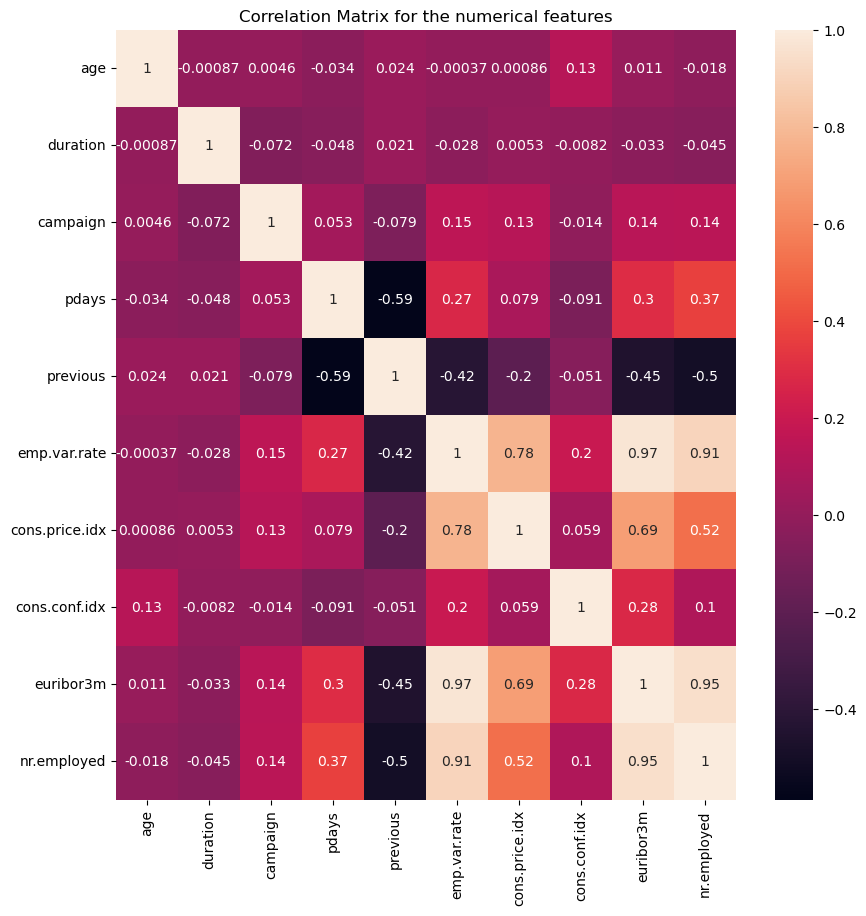

In [70]:
# Box plots of the Numerical features to examine the distribution of the features
num_column_lst = []
for icol in df.columns:
    if df[icol].dtypes in ['float64', 'int64']:
        num_column_lst.append(icol)
print(num_column_lst)

df_num = df[num_column_lst]
plt.figure(figsize=(10, 10))
sns.heatmap(df_num.corr(), annot=True)
plt.title('Correlation Matrix for the numerical features')

Text(0.5, 1.0, 'Pairplot for the numerical features')

<Figure size 1000x1000 with 0 Axes>

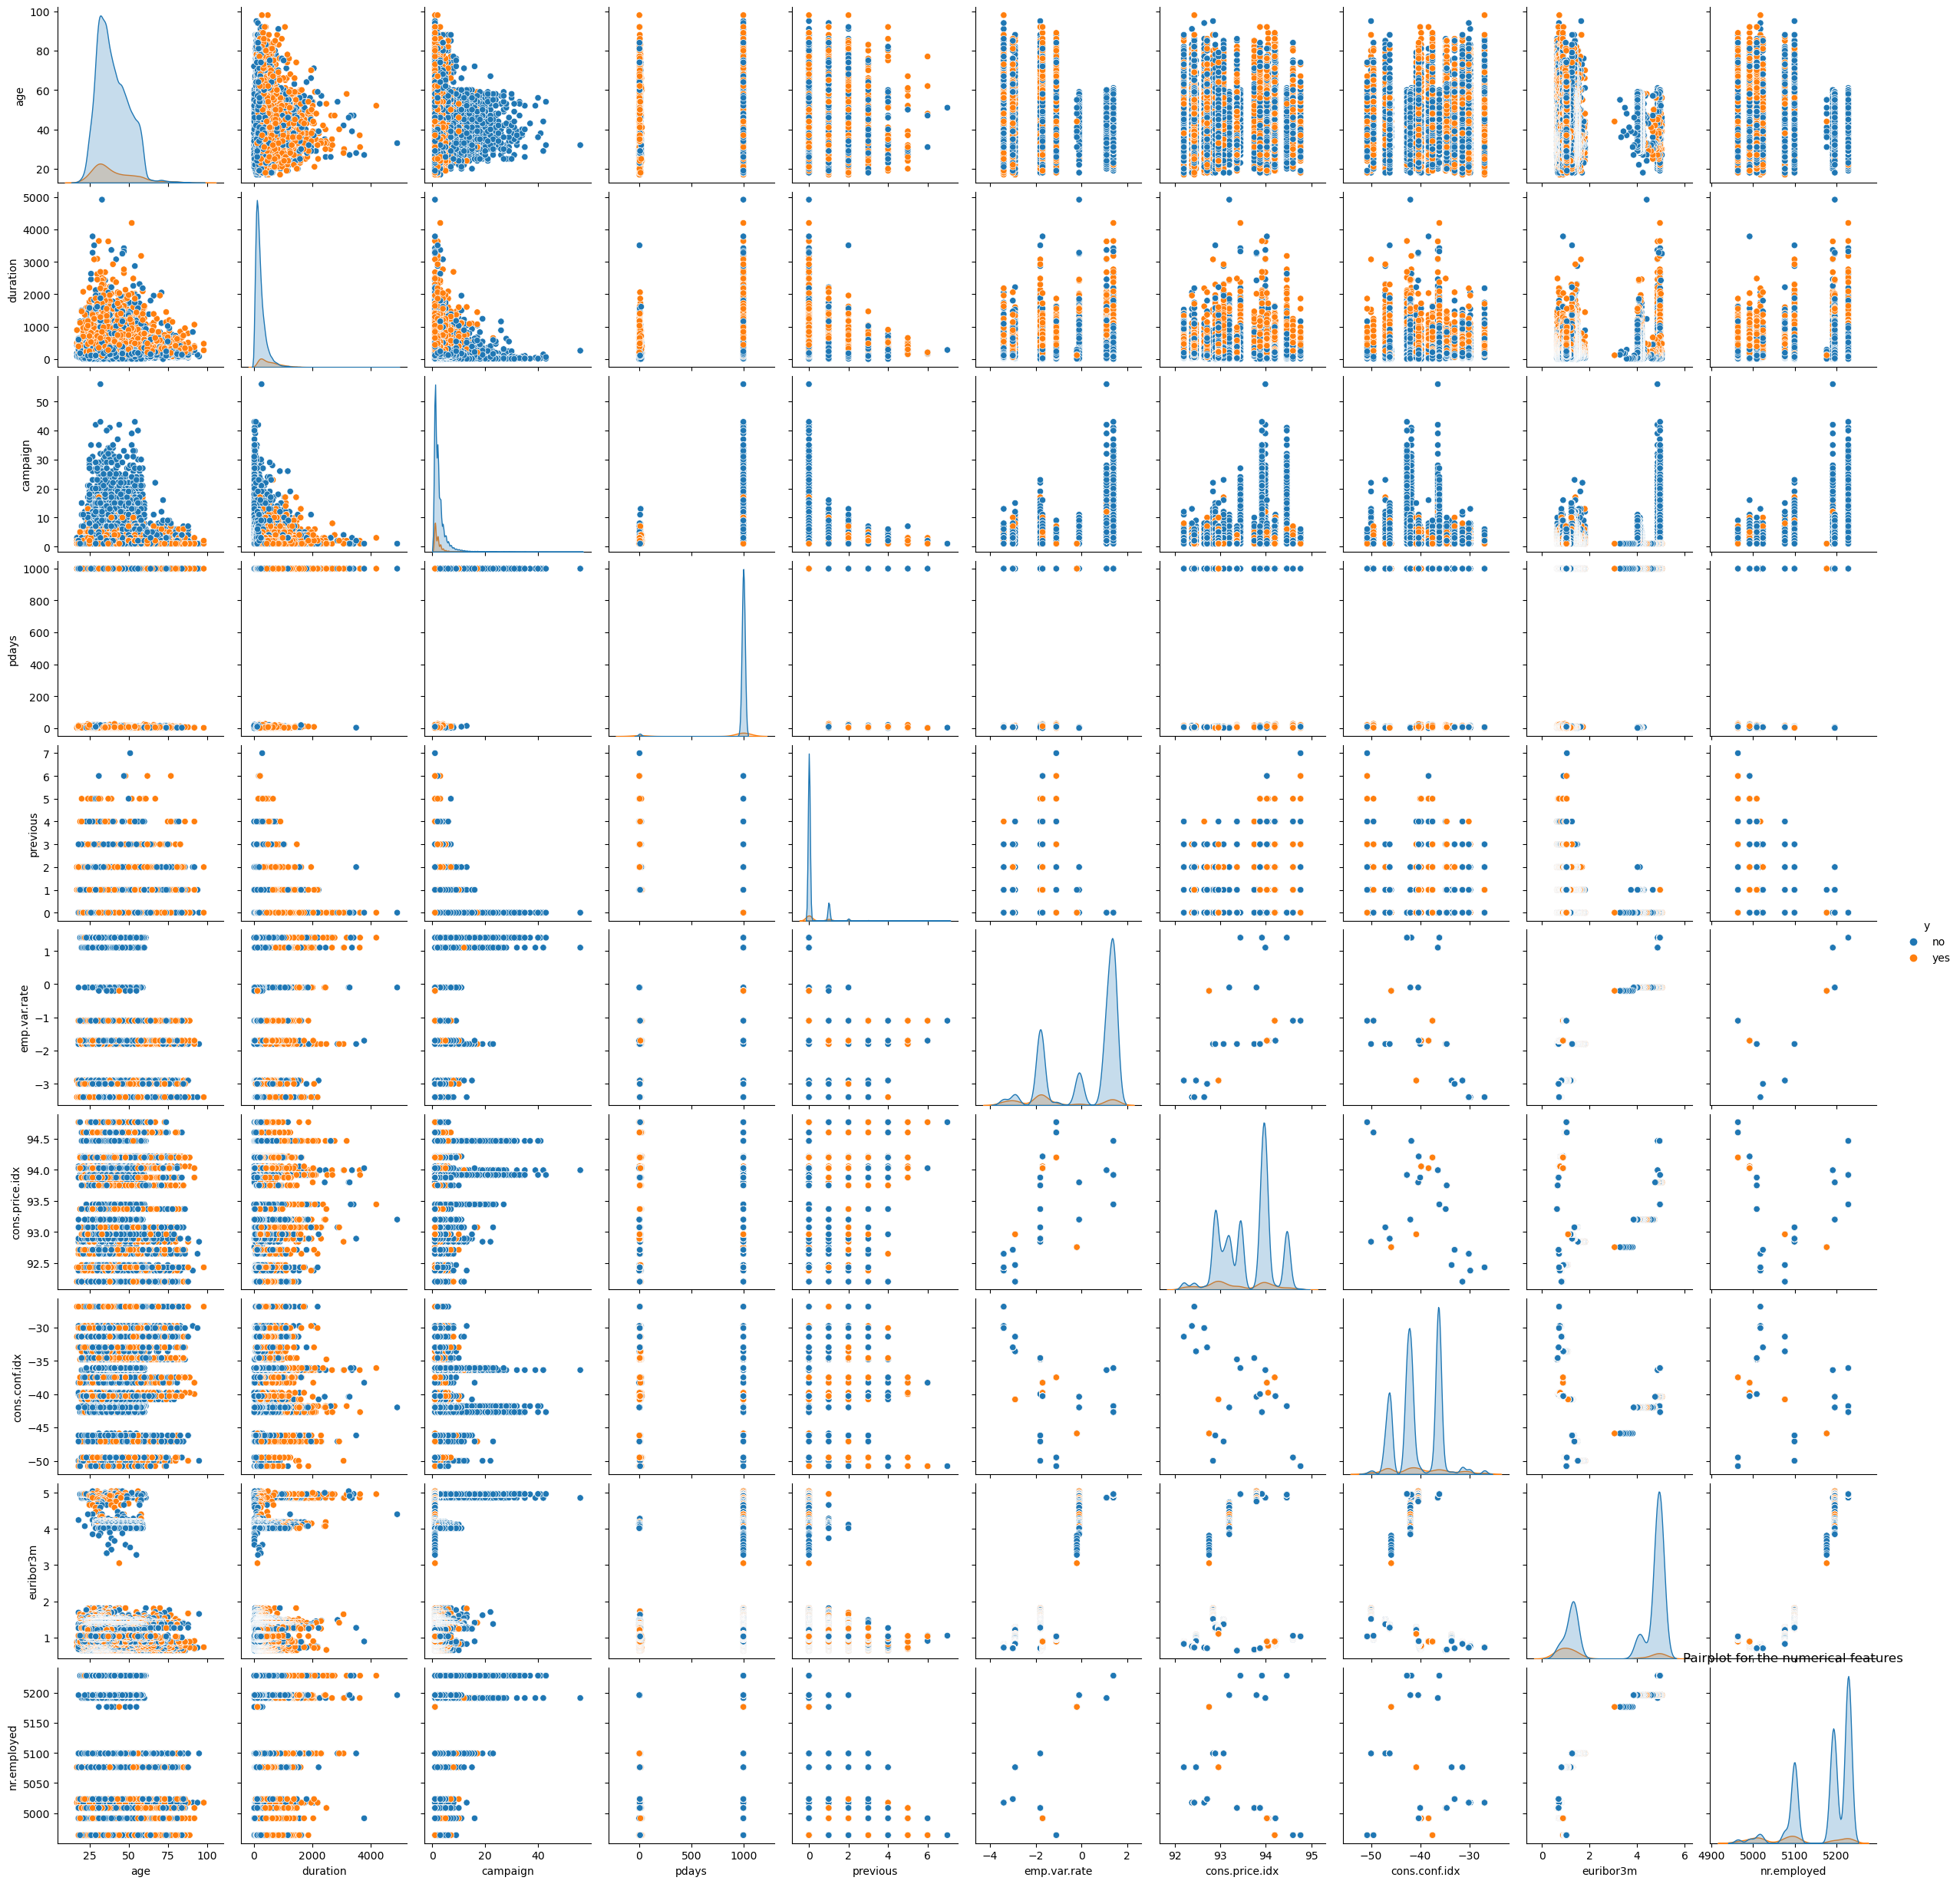

In [72]:
df_num_copy = df_num
df_num_copy['y'] = df['y']
plt.figure(figsize=(10, 10))
sns.pairplot(data=df_num_copy, hue = 'y')
plt.title('Pairplot for the numerical features')

###  Understanding the Features

After examining the description and data, the preliminary conclusion is as follows:
* The dataset is complete 
* Does not have any N/A or null value.
* There are 10 string features 
* There are 10 numerical features.
* There are 2 BINARY features: 'contact','y'
* Numerical Features conclusion
 * Features considered being dropped: 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'nr.employed', 'cons.price.idx', 'euribor3m'
 * drop: 'nr.employed, 'pdays'



### Business Objective of the task
The business objective is to 
* compare the performance of the classification models  
* Before classification, train the models with the given dataset to predict that if a client has subscribed a term deposite or not
* Analysis the score and compare them based on the performance of all the models
* Try to improve the performace of the models by tuning the hyperparameters
* And then find out the best model for this business problem

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [73]:
df_copy = df.convert_dtypes()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  Int64  
 1   job             41188 non-null  string 
 2   marital         41188 non-null  string 
 3   education       41188 non-null  string 
 4   default         41188 non-null  string 
 5   housing         41188 non-null  string 
 6   loan            41188 non-null  string 
 7   contact         41188 non-null  string 
 8   month           41188 non-null  string 
 9   day_of_week     41188 non-null  string 
 10  duration        41188 non-null  Int64  
 11  campaign        41188 non-null  Int64  
 12  pdays           41188 non-null  Int64  
 13  previous        41188 non-null  Int64  
 14  poutcome        41188 non-null  string 
 15  emp.var.rate    41188 non-null  Float64
 16  cons.price.idx  41188 non-null  Float64
 17  cons.conf.idx   41188 non-null 

In [74]:
df_copy.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [75]:
# Clean up
#previous: number of contacts performed before this campaign and for this client (numeric)
# and this column has 35563 values = 0, so dropping the column
df_copy.drop('previous', axis=1, inplace=True)

columns_7 = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan','y']
df_column_7 = df_copy[columns_7]

In [76]:
df_column_7
df_column_7.describe(include = ['string'])

,job,marital,education,default,housing,loan,y
count,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2
top,admin.,married,university.degree,no,yes,no,no
freq,10422,24928,12168,32588,21576,33950,36548


In [77]:
df_column_7.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'y'],
      dtype='object')

In [78]:
#categorical features
training = pd.get_dummies(df_column_7, columns=["job","marital","education","default","housing","loan"])
training

,age,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
0,56,no,False,False,False,True,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,57,no,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,True,False,False
2,37,no,False,False,False,False,False,False,False,True,...,False,True,False,False,False,False,True,True,False,False
3,40,no,True,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
4,56,no,False,False,False,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,yes,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,True,True,False,False
41184,46,no,False,True,False,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
41185,56,no,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,True,True,False,False
41186,44,yes,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False


In [79]:
## Dropping default_no, housing-no and loan_no columns
training.drop('default_no', axis=1, inplace=True)
training.drop('housing_no', axis=1, inplace=True)
training.drop('loan_no', axis=1, inplace=True)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [80]:
cols = ['age', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes', 'housing_unknown',
       'housing_yes','loan_unknown', 'loan_yes']

X = training[cols]
y = training['y']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

DummyClassifier makes predictions that ignore the input features.

This classifier serves as a simple baseline to compare against other more complex classifiers.

The specific behavior of the baseline is selected with the strategy parameter.


In [82]:
dummy_clf = DummyClassifier().fit(X_train, y_train)
baseline_score = dummy_clf.score(X_test, y_test)
print("Dummy classifier Model Score is %2.3f" % baseline_score)

Dummy classifier Model Score is 0.887


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [83]:
lr = LogisticRegression()
#start time
lr_start_time =  time.time()
lr.fit(X_train, y_train)
#end time
lr_end_time =  time.time()
#LR train time
lr_train_time =lr_end_time -lr_start_time
print("Logistic Regression train time : %2.3f" % lr_train_time)

Logistic Regression train time : 0.280


### Problem 9: Score the Model

What is the accuracy of your model?

In [84]:
y_pred = lr.predict(X_test)
print("Logistic Regression accuracy : %2.3f" % accuracy_score(y_test, y_pred))

Logistic Regression accuracy : 0.887


In [85]:
lr_train_accuracy = accuracy_score(y_train, lr.predict(X_train.values))
lr_test_accuracy = accuracy_score(y_test, lr.predict(X_test))
print('Logistic Regression Train Score :  %2.4f' % lr_train_accuracy)
print('Logistic Regression Test Score : %2.4f' % lr_test_accuracy)

Logistic Regression Train Score :  0.8876
Logistic Regression Test Score : 0.8865


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

### K-Nearest Neighbor(KNN)  Model

In [86]:
# Start time
knn_start = time.time()
knn = KNeighborsClassifier().fit(X_train,y_train)
# End time
knn_end = time.time()
# Training timr
knn_train_time = (knn_end - knn_start)
print("KNN Train Time : %.4f" % knn_train_time)
y_pred = knn.predict(X_test.values)
knn_train_accuracy = accuracy_score(y_train, knn.predict(X_train.values))
knn_test_accuracy = accuracy_score(y_test, knn.predict(X_test.values))
print('KNN Train Score : %2.4f' % knn_train_accuracy)
print('KNN Test Score : %2.4f' % knn_test_accuracy)

KNN Train Time : 0.0499
KNN Train Score : 0.8902
KNN Test Score : 0.8740


### Decision Tree(DT) Model

In [87]:
# Start time
dt_start = time.time()
dt = DecisionTreeClassifier().fit(X_train, y_train)
# End time
dt_end = time.time()
# total train time
dt_train_time = dt_end - dt_start
print("Decision Tree Train Time : %.4f" % dt_train_time)
dt_train_accuracy = accuracy_score(y_train, dt.predict(X_train))
dt_test_accuracy = accuracy_score(y_test, dt.predict(X_test))
print('Decision Tree Train Score : %2.4f' % dt_train_accuracy)
print('Decision Tree Test Score : %2.4f' % dt_test_accuracy)

Decision Tree Train Time : 0.0883
Decision Tree Train Score : 0.9166
Decision Tree Test Score : 0.8619


#### Suport Verctor Machine (SVM)  Model

In [88]:
# Start time
svc_start = time.time()
svc = SVC().fit(X_train, y_train)
# End Time
svc_end = time.time()
# Training time
svc_train_time = svc_end - svc_start
print("SVM Train Time : %.4f" % svc_train_time)
svm_train_accuracy = accuracy_score(y_train, svc.predict(X_train))
svm_test_accuracy = accuracy_score(y_test, svc.predict(X_test))
print('SVM Train Score : %2.4f' % svm_train_accuracy)
print('SVM Test Score : %2.4f' % svm_test_accuracy)

SVM Train Time : 6.1659
SVM Train Score : 0.8876
SVM Test Score : 0.8865


#### Store the scores

In [89]:
results_dict = {'Model': ['Logistic Regression','KNN', 'Decision Tree', 'SVM'],
           'Train Time': [lr_train_time, knn_train_time, dt_train_time, svc_train_time],
           'Train Accuracy': [lr_train_accuracy, knn_train_accuracy, dt_train_accuracy, svm_train_accuracy],
           'Test Accuracy': [lr_test_accuracy, knn_test_accuracy, dt_test_accuracy, svm_test_accuracy]}
# score data frame of the models
results_df = pd.DataFrame(results_dict)
results_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.279968,0.887557,0.886502
1,KNN,0.049888,0.890228,0.873999
2,Decision Tree,0.088303,0.916601,0.861860
3,SVM,6.165900,0.887557,0.886502


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

#### Train/Test Split

In [90]:
# 
cols = ['age', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes', 'housing_unknown',
       'housing_yes','loan_unknown', 'loan_yes']

X1 = training[cols]
y1 = training['y']

In [91]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

#### Logistic Regression mode

In [92]:
# Start time
lr1_start_time = time.time()
lr1 = LogisticRegression(max_iter = 1000)
lr1.fit(X1_train, y1_train)
lr1_end_time = time.time()
lr1_train_time = (lr1_end_time - lr_start_time)
print("After Improvement, Logistic Regression Train Time :  %.4f" % lr1_train_time)

After Improvement, Logistic Regression Train Time :  29.6675


In [93]:
lr1_train_accuracy = accuracy_score(y1_train, lr1.predict(X1_train))
lr1_test_accuracy = accuracy_score(y1_test, lr1.predict(X1_test))
print('After Improvement, Logistic Regression Train Score : %2.4f' % lr1_train_accuracy)
print('After Improvement, Logistic Regression Test Score : %2.4f' % lr1_test_accuracy)

After Improvement, Logistic Regression Train Score : 0.8876
After Improvement, Logistic Regression Test Score : 0.8865


In [94]:
# classification report
print(classification_report(y1_test,lr1.predict(X1_test)))

              precision    recall  f1-score   support

          no       0.89      1.00      0.94      7303
         yes       0.00      0.00      0.00       935

    accuracy                           0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.79      0.89      0.83      8238



Text(0.5, 23.52222222222222, 'Predicted label')

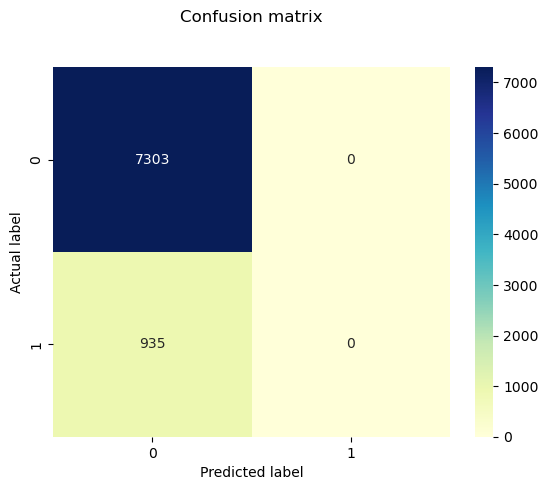

In [95]:
#Confusion Matrix
lr_cnf_matrix = metrics.confusion_matrix(y1_test, lr1.predict(X1_test))
p = sns.heatmap(pd.DataFrame(lr_cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### K-Nearest Neighbor(KNN)  Model

In [96]:
knn_test_scores = []
knn_train_scores = []

for i in range(1,20):

    knn = KNeighborsClassifier(i)
    knn.fit(X1_train,y1_train)
    
    knn_train_scores.append(knn.score(X1_train.values,y1_train.values))
    knn_test_scores.append(knn.score(X1_test.values,y1_test.values))

In [97]:
knn_max_test_score = max(knn_test_scores)
knn_test_scores_ind = [i for i, v in enumerate(knn_test_scores) if v == knn_max_test_score]
print('Max test score {} % and k = {}'.format(knn_max_test_score*100,list(map(lambda x: x+1, knn_test_scores_ind))))

Max test score 88.48021364408837 % and k = [8]


In [98]:
# start time
knn1_start_time = time.time()
knn1 = KNeighborsClassifier(14).fit(X1_train,y1_train)
# End time
knn1_end_time = time.time()
# train time
knn1_train_time = (knn1_end_time - knn1_start_time)
print("After improvemnet, KNN Train Time :  %.4f" % knn1_train_time)

After improvemnet, KNN Train Time :  0.0219


In [99]:
knn1_train_accuracy = accuracy_score(y1_train, knn1.predict(X1_train.values))
knn1_test_accuracy = accuracy_score(y1_test, knn1.predict(X1_test.values))
print('After improvemnet, KNN Train Score : %2.4f' % knn1_train_accuracy)
print('After improvemnet, KNN Test Score : %2.4f' % knn1_test_accuracy)

After improvemnet, KNN Train Score : 0.8894
After improvemnet, KNN Test Score : 0.8843


Text(0.5, 23.52222222222222, 'Predicted label')

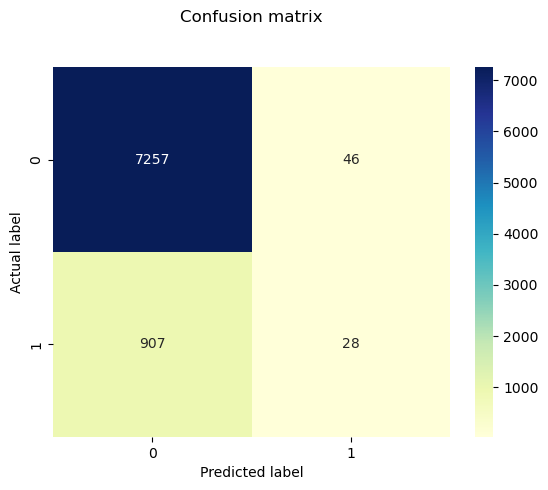

In [102]:
#Confusion matrix
knn1_cnf_matrix = metrics.confusion_matrix(y1_test, knn1.predict(X1_test.values))
p = sns.heatmap(pd.DataFrame(knn1_cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Decision Tree(DT) Model

In [103]:
dt_train_accuracies = []
#print(train_accuracies, 'starting with empty list \n')
dt_test_accuracies = []
#print(test_accuracies, 'starting with empty list \n')


for i in range(1, 10):
    dt_model = DecisionTreeClassifier(max_depth=i).fit(X1_train, y1_train)
    dt_train_accuracy = accuracy_score(y1_train, dt_model.predict(X1_train))
    dt_test_accuracy = accuracy_score(y1_test, dt_model.predict(X1_test))
    dt_train_accuracies.append(dt_train_accuracy)
    dt_test_accuracies.append(dt_test_accuracy)
    print(f"Max Depth: {i}, Train Accuracy: {dt_train_accuracy:.4f}, Test Accuracy: {dt_test_accuracy:.4f}")

Max Depth: 1, Train Accuracy: 0.8876, Test Accuracy: 0.8865
Max Depth: 2, Train Accuracy: 0.8876, Test Accuracy: 0.8865
Max Depth: 3, Train Accuracy: 0.8876, Test Accuracy: 0.8865
Max Depth: 4, Train Accuracy: 0.8881, Test Accuracy: 0.8871
Max Depth: 5, Train Accuracy: 0.8884, Test Accuracy: 0.8869
Max Depth: 6, Train Accuracy: 0.8890, Test Accuracy: 0.8854
Max Depth: 7, Train Accuracy: 0.8896, Test Accuracy: 0.8854
Max Depth: 8, Train Accuracy: 0.8903, Test Accuracy: 0.8850
Max Depth: 9, Train Accuracy: 0.8914, Test Accuracy: 0.8837


In [104]:
# Start time
dt1_start_time = time.time()
model_dt = DecisionTreeClassifier(max_depth=4).fit(X1_train, y1_train)
# End time
dt1_end_time = time.time()
#train time
dt1_train_time = dt1_end_time - dt1_start_time
print("After improvemnet, Decision Tree Train Time :  %.4f" % dt1_train_time)

After improvemnet, Decision Tree Train Time :  0.0734


In [105]:
dt1_train_accuracy = accuracy_score(y1_train, model_dt.predict(X1_train))
dt1_test_accuracy = accuracy_score(y1_test, model_dt.predict(X1_test))
print('After improvement, Decision Tree Train Score : %2.4f' % dt1_train_accuracy)
print('After improvement, Decision Tree Test Score : %2.4f' % dt1_test_accuracy)

After improvement, Decision Tree Train Score : 0.8881
After improvement, Decision Tree Test Score : 0.8871


Text(0.5, 23.52222222222222, 'Predicted label')

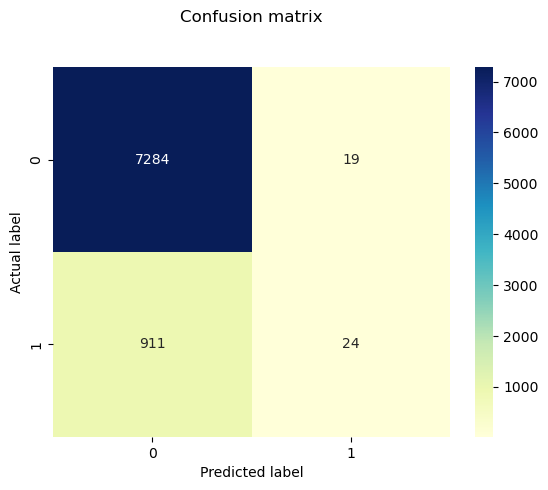

In [106]:
# Confusion matrix
dt1_cnf_matrix = metrics.confusion_matrix(y1_test, model_dt.predict(X1_test))
p = sns.heatmap(pd.DataFrame(dt1_cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [107]:
# classification report
print(classification_report(y1_test,model_dt.predict(X1_test)))

              precision    recall  f1-score   support

          no       0.89      1.00      0.94      7303
         yes       0.56      0.03      0.05       935

    accuracy                           0.89      8238
   macro avg       0.72      0.51      0.49      8238
weighted avg       0.85      0.89      0.84      8238



#### Suport Verctor Machine (SVM)  Model

In [109]:
#start time
svm1_start_time = time.time()
svm1 = SVC(kernel = 'rbf', gamma = 0.1).fit(X1_train, y1_train)
# end time
svm1_end_time = time.time()
# train time
svm1_train_time = svm1_end_time - svm1_start_time
print("After improvement, SVM Train Time : %.4f" % svm1_train_time)

After improvement, SVM Train Time : 33.0931


In [110]:
svm1_train_accuracy = accuracy_score(y1_train, svm1.predict(X1_train))
svm1_test_accuracy = accuracy_score(y1_test, svm1.predict(X1_test))
print('After improvement, SVM Train Score : %2.4f' % svm1_train_accuracy)
print('After improvement, SVM Test Score : %2.4f' % svm1_test_accuracy)

After improvement, SVM Train Score : 0.8897
After improvement, SVM Test Score : 0.8853


Text(0.5, 23.52222222222222, 'Predicted label')

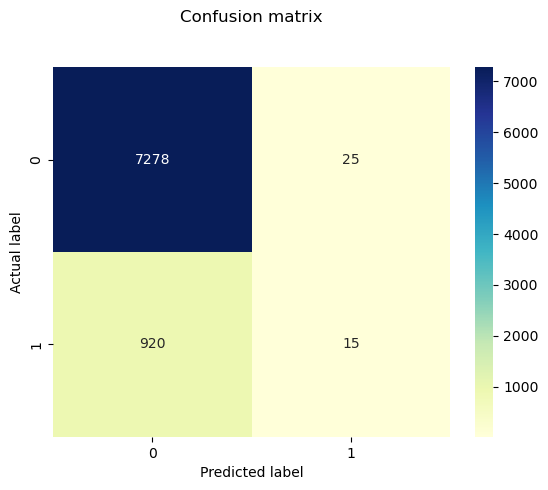

In [111]:
# Confusion matrix
svm1_cnf_matrix = metrics.confusion_matrix(y1_test, svm1.predict(X1_test))
p = sns.heatmap(pd.DataFrame(svm1_cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [112]:
# classification report
print(classification_report(y1_test,svm1.predict(X1_test)))

              precision    recall  f1-score   support

          no       0.89      1.00      0.94      7303
         yes       0.38      0.02      0.03       935

    accuracy                           0.89      8238
   macro avg       0.63      0.51      0.48      8238
weighted avg       0.83      0.89      0.84      8238



#### Store the scores after improment

In [113]:
results_dict_1 = {'Model': ['Logistic Regression','KNN', 'Decision Tree', 'SVM'],
           'Train Time': [lr1_train_time, knn1_train_time, dt1_train_time, svm1_train_time],
           'Train Accuracy': [lr1_train_accuracy, knn1_train_accuracy, dt1_train_accuracy, svm1_train_accuracy],
           'Test Accuracy': [lr1_test_accuracy, knn1_test_accuracy, dt1_test_accuracy, svm1_test_accuracy]}
results_df_1 = pd.DataFrame(results_dict_1)

In [53]:
results_df_1

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,22.758870,0.887557,0.886502
1,KNN,0.021629,0.889408,0.884317
2,Decision Tree,0.034463,0.888073,0.887109
3,SVM,35.396768,0.889651,0.885288


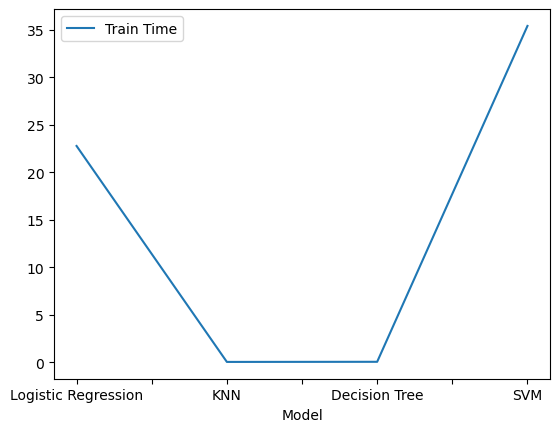

In [54]:

results_df_1.plot(x="Model", y=["Train Time"])
plt.show()

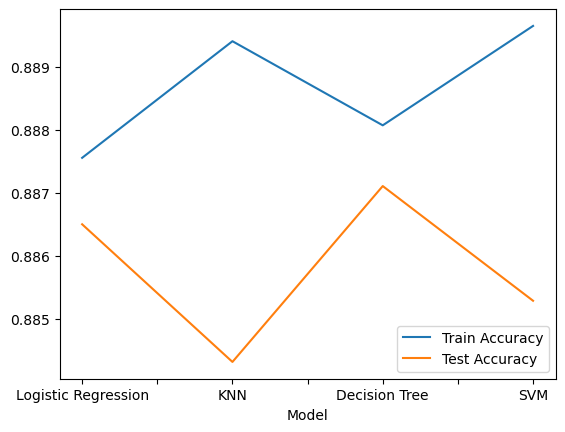

In [55]:

results_df_1.plot(x="Model", y=["Train Accuracy","Test Accuracy"])
plt.show()

In [56]:
results_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.246947,0.887557,0.886502
1,KNN,0.060688,0.890228,0.873999
2,Decision Tree,0.088269,0.916601,0.861981
3,SVM,5.994117,0.887557,0.886502


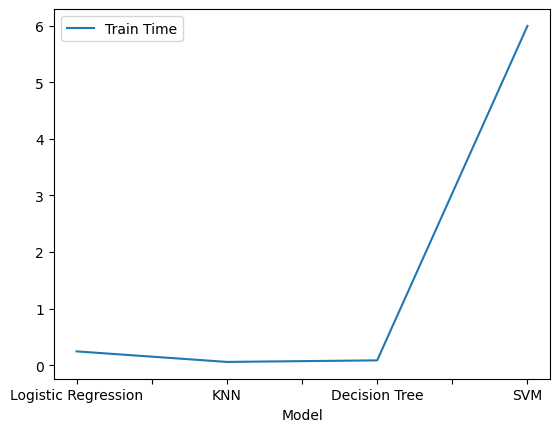

In [57]:
results_df.plot(x="Model", y=["Train Time"])
plt.show()

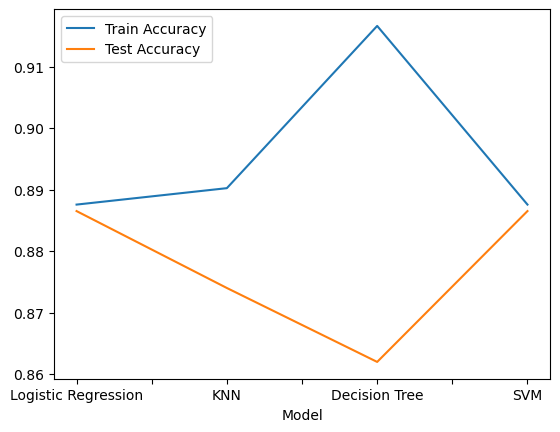

In [58]:
results_df.plot(x="Model", y=["Train Accuracy","Test Accuracy"])
plt.show()

### Conclusion